<a href="https://colab.research.google.com/github/abhishektuteja01/Nifty50predmodel1/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf #source of info
import pandas as pd

In [5]:
nifty50data = yf.Ticker("^NSEI") #choosing NIFTY50 as the index to predict

In [6]:
nifty50 = nifty50data.history(period="max")

<Axes: xlabel='Date'>

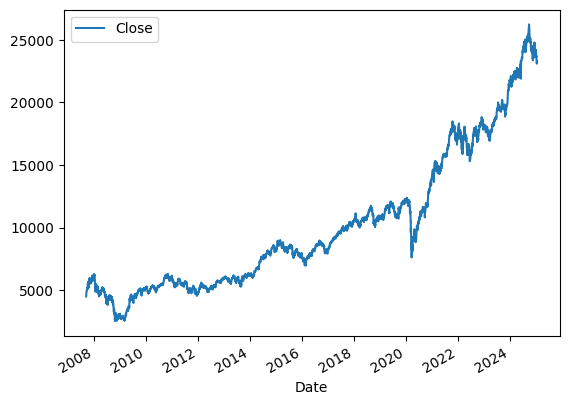

In [7]:
nifty50.plot.line(y="Close", use_index = True)

In [8]:
del nifty50["Dividends"]
del nifty50["Stock Splits"]

In [9]:
nifty50["Tomorrow"] = nifty50["Close"].shift(-1)

In [36]:
nifty50

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2011-10-13 00:00:00+05:30,5130.799805,5136.950195,5067.649902,5077.850098,0,5132.299805,1,0.997883,1.0,1.014789,3.0,0.992330,23.0,0.911365,111.0,1.042939,510.0
2011-10-14 00:00:00+05:30,5057.350098,5141.399902,5056.600098,5132.299805,0,5118.250000,0,1.005333,1.0,1.015754,3.0,1.004393,24.0,0.921801,111.0,1.053995,510.0
2011-10-17 00:00:00+05:30,5156.200195,5160.200195,5084.500000,5118.250000,0,5037.500000,0,0.998629,1.0,1.007444,2.0,1.003264,23.0,0.919921,111.0,1.051026,509.0
2011-10-18 00:00:00+05:30,5049.450195,5057.500000,5011.049805,5037.500000,0,5139.149902,1,0.992049,0.0,0.989091,2.0,0.989147,23.0,0.906187,110.0,1.034383,508.0
2011-10-19 00:00:00+05:30,5080.450195,5148.049805,5075.299805,5139.149902,0,5091.899902,0,1.009989,1.0,1.007477,2.0,1.010438,24.0,0.925163,111.0,1.055190,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-10 00:00:00+05:30,23551.900391,23596.599609,23344.349609,23431.500000,261000,23085.949219,0,0.997977,0.0,0.993105,1.0,0.970662,23.0,0.995763,136.0,1.238383,545.0
2025-01-13 00:00:00+05:30,23195.400391,23340.949219,23047.250000,23085.949219,316500,23176.050781,1,0.992572,0.0,0.982876,1.0,0.957594,23.0,0.980849,135.0,1.219518,544.0
2025-01-14 00:00:00+05:30,23165.900391,23264.949219,23134.150391,23176.050781,311200,23213.199219,1,1.001948,1.0,0.991201,1.0,0.962379,24.0,0.984399,136.0,1.223676,544.0


In [11]:
nifty50['Target']= (nifty50['Tomorrow'] > nifty50['Close']).astype(int)

In [12]:
nifty50

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2025-01-13 00:00:00+05:30,23195.400391,23340.949219,23047.250000,23085.949219,316500,23176.050781,1
2025-01-14 00:00:00+05:30,23165.900391,23264.949219,23134.150391,23176.050781,311200,23213.199219,1
2025-01-15 00:00:00+05:30,23250.449219,23293.650391,23146.449219,23213.199219,228000,23311.800781,1


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 500, min_samples_split = 100, random_state = 1)

train = nifty50.iloc[:-200]
test = nifty50.iloc[-200:]

predictors = ["Close", "Volume", "Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=500, random_state=1)

In [14]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [15]:
preds = pd.Series(preds, index =test.index)

In [16]:
precision_score(test['Target'],preds)

0.6470588235294118

In [18]:
combined = pd.concat([test["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

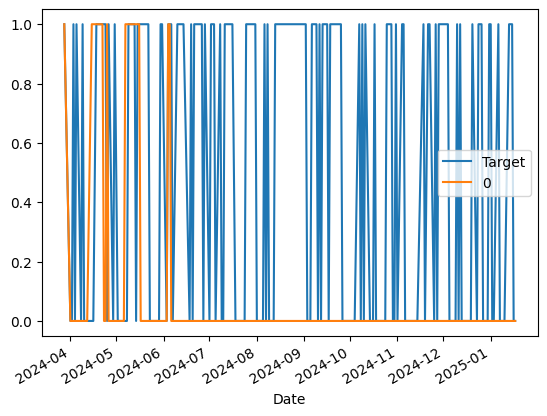

In [19]:
combined.plot()

In [20]:
def predict(train,test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index =test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [26]:
def backtest(data, model, predictors, start = 2500, steps= 250):
  all_predictions = []

  for i in range(start, data.shape[0], steps):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+steps)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [27]:
predictions = backtest(nifty50, model,predictors)

In [28]:
predictions["Predictions"].value_counts()

,count
Predictions,
1,1025
0,726


In [29]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5434146341463415

In [30]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.547116
0,0.452884


In [33]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = nifty50.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  nifty50[ratio_column] = nifty50["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  nifty50[trend_column] = nifty50.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [35]:
nifty50 = nifty50.dropna()

In [37]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [ ]:
def predict(train,test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index =test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined